In [25]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
#conda install -c conda-forge python-graphviz (para evitar warnings)

(-0.5, 1759.5, 1359.5, -0.5)

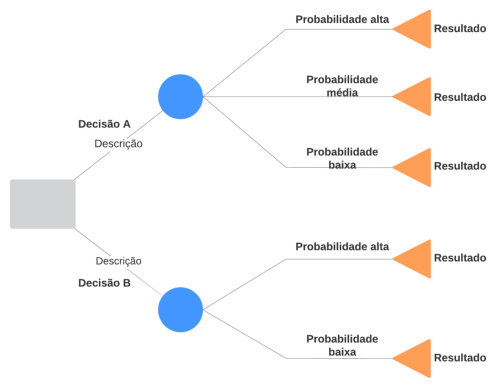

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('arvore_decisao.webp')
plt.imshow(imagem)
plt.axis('off') 

# ANALISE SUPERFICIAL DOS DADOS

In [27]:
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


# SEPARANDO X Y

In [28]:
previsores = credito.iloc[:,0:-1].values
classe = credito.iloc[:, -1].values
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

# AJUSTANDO DADOS CATEGORICOS/OBJECTS

In [29]:
colunas_categoricas = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

for c in colunas_categoricas:
    label_encoder = LabelEncoder()
    previsores[:, c] = label_encoder.fit_transform(previsores[:, c])
    
previsores[0, :]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

# SEPARANDO DADOS PARA O TREINAMENTO

In [30]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.2,
                                                                  random_state = 0)
X_treinamento[0, :]

array([1, 36, 2, 1, 2862, 1, 3, 4, 3, 2, 3, 1, 30, 1, 0, 1, 3, 1, 0, 1],
      dtype=object)

# TREINANDO MODELO

In [31]:
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [32]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(arvore, out_file = 'tree.dot')

# ANALISANDO RESULTADOS

In [33]:
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'go

In [34]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 23,  35],
       [ 29, 113]], dtype=int64)

In [35]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.68

In [36]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.31999999999999995